In [0]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 86.3MB 39kB/s 
     |████████████████████████████████| 450kB 43.1MB/s 
     |████████████████████████████████| 3.8MB 49.2MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [0]:
tf.__version__

'2.0.0'

In [0]:
keras.backend.backend()

'tensorflow'

In [0]:
from keras.datasets import fashion_mnist


In [0]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
xtrain[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [0]:
ytrain[0:2]

array([9, 0], dtype=uint8)

In [0]:
xtest[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [0]:
ytest[0:2]

array([9, 2], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt

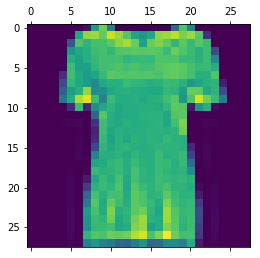

In [0]:
plt.matshow(xtrain[10])

In [0]:
ytrain[10]

0

In [0]:
len(xtrain)

60000

In [0]:
xtrain = xtrain/255
xtest = xtest/255

In [0]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [0]:
model = Sequential()

In [0]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [0]:
xtrain.shape

(60000, 28, 28)

In [0]:
ytrain = ytrain.reshape(-1,1)

In [0]:
ytrain.shape

(60000, 1)

In [0]:
model.fit(xtrain,ytrain, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4840 - accuracy: 0.8295
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3667 - accuracy: 0.8663
Epoch 3/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3286 - accuracy: 0.8802
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3061 - accuracy: 0.8881
Epoch 5/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2861 - accuracy: 0.8939


In [0]:
ypred = model.predict(xtest)

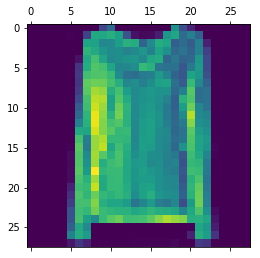

In [0]:
plt.matshow(xtest[103])

In [0]:
ypred[103]

array([1.3443895e-01, 3.4387317e-04, 2.3825456e-01, 3.8697772e-02,
       3.4336556e-02, 1.1556653e-04, 5.5225199e-01, 2.5409658e-05,
       1.4932170e-03, 4.1992360e-05], dtype=float32)

In [0]:
import numpy as np

In [0]:
np.argmax(ypred[3])

1

In [0]:
model.evaluate( xtest, ytest)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34150617847442627, 0.8809]

In [0]:
from keras.datasets import mnist

In [0]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
xtrain[0:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [0]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [0]:
model = Sequential()

In [0]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(200,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics = ['accuracy'])

In [0]:
model.fit(xtrain, ytrain, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 201us/sample - loss: 1.2570 - accuracy: 0.8736
Epoch 2/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2737 - accuracy: 0.9396
Epoch 3/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.1517 - accuracy: 0.9606
Epoch 4/5
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0989 - accuracy: 0.9721
Epoch 5/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0657 - accuracy: 0.9807


In [0]:
ypred = model.predict(xtest)

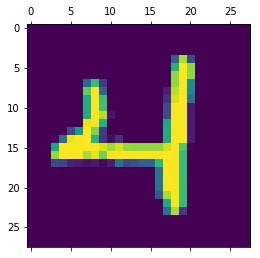

In [0]:
plt.matshow(xtest[103])

In [0]:
ypred[103]

array([2.6433127e-33, 1.2888759e-27, 6.1467269e-19, 1.4297941e-19,
       1.0000000e+00, 1.5652126e-21, 1.3419064e-28, 7.8250161e-18,
       3.0768323e-24, 9.7495451e-17], dtype=float32)

In [0]:
np.argmax(ypred[103])

4

In [0]:
model.evaluate(xtest,ytest)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.16274576959281403, 0.9644]